In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv("nfl_plays_offense_personnel.csv")
plays23 = pd.read_csv("nfl_23_plays_offense_personnel.csv")
data.columns.tolist()

['season_type',
 'posteam',
 'posteam_type',
 'side_of_field',
 'yardline_100',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'qtr',
 'down',
 'time',
 'ydstogo',
 'play_type',
 'yards_gained',
 'pass_length',
 'pass_location',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'interception',
 'safety',
 'fumble_lost',
 'touchdown',
 'field_goal_attempt',
 'punt_attempt',
 'offense_formation',
 'offense_personnel',
 'route',
 'o_personnel',
 'personnel_num']

In [12]:
data.dropna(subset=['down'], inplace=True)
data.dropna(subset=['play_type'], inplace=True)
data.dropna(subset=['score_differential'], inplace=True)
plays23.dropna(subset=['down'], inplace=True)
plays23.dropna(subset=['play_type'], inplace=True)
plays23.dropna(subset=['score_differential'], inplace=True)
plays23.dropna(subset=['defteam_score'], inplace=True)

In [143]:
data

,season_type,posteam,posteam_type,side_of_field,yardline_100,quarter_seconds_remaining,half_seconds_remaining,qtr,down,time,...,safety,fumble_lost,touchdown,field_goal_attempt,punt_attempt,offense_formation,offense_personnel,route,o_personnel,personnel_num
1,REG,TEN,home,TEN,75,900,1800,1,1.0,15:00,...,0,0,0,0,0,SINGLEBACK,"1 RB, 2 TE, 2 WR",NaN,"1 RB, 2 TE, 2 WR",12.0
2,REG,TEN,home,TEN,78,863,1763,1,2.0,14:23,...,0,0,0,0,0,SHOTGUN,"1 RB, 2 TE, 2 WR",ANGLE,"1 RB, 2 TE, 2 WR",12.0
3,REG,TEN,home,TEN,75,822,1722,1,3.0,13:42,...,0,0,0,0,0,SHOTGUN,"1 RB, 1 TE, 3 WR",HITCH,"1 RB, 1 TE, 3 WR",11.0
4,REG,TEN,home,TEN,75,819,1719,1,4.0,13:39,...,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN
5,REG,ARI,away,ARI,61,807,1707,1,1.0,13:27,...,0,0,0,0,0,SHOTGUN,"1 RB, 2 TE, 2 WR",GO,"1 RB, 2 TE, 2 WR",12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130819,POST,KC,home,SF,37,168,168,5,2.0,02:48,...,0,0,0,0,0,SHOTGUN,"1 RB, 1 TE, 3 WR",SCREEN,"1 RB, 1 TE, 3 WR",11.0
130820,POST,KC,home,SF,32,127,127,5,3.0,02:07,...,0,0,0,0,0,SHOTGUN,"1 RB, 2 TE, 2 WR",NaN,"1 RB, 2 TE, 2 WR",12.0
130821,POST,KC,home,SF,13,86,86,5,1.0,01:26,...,0,0,0,0,0,SHOTGUN,"1 RB, 3 TE, 1 WR",NaN,"1 RB, 3 TE, 1 WR",13.0
130822,POST,KC,home,SF,10,50,50,5,2.0,00:50,...,0,0,0,0,0,SHOTGUN,"1 RB, 1 TE, 3 WR",SCREEN,"1 RB, 1 TE, 3 WR",11.0


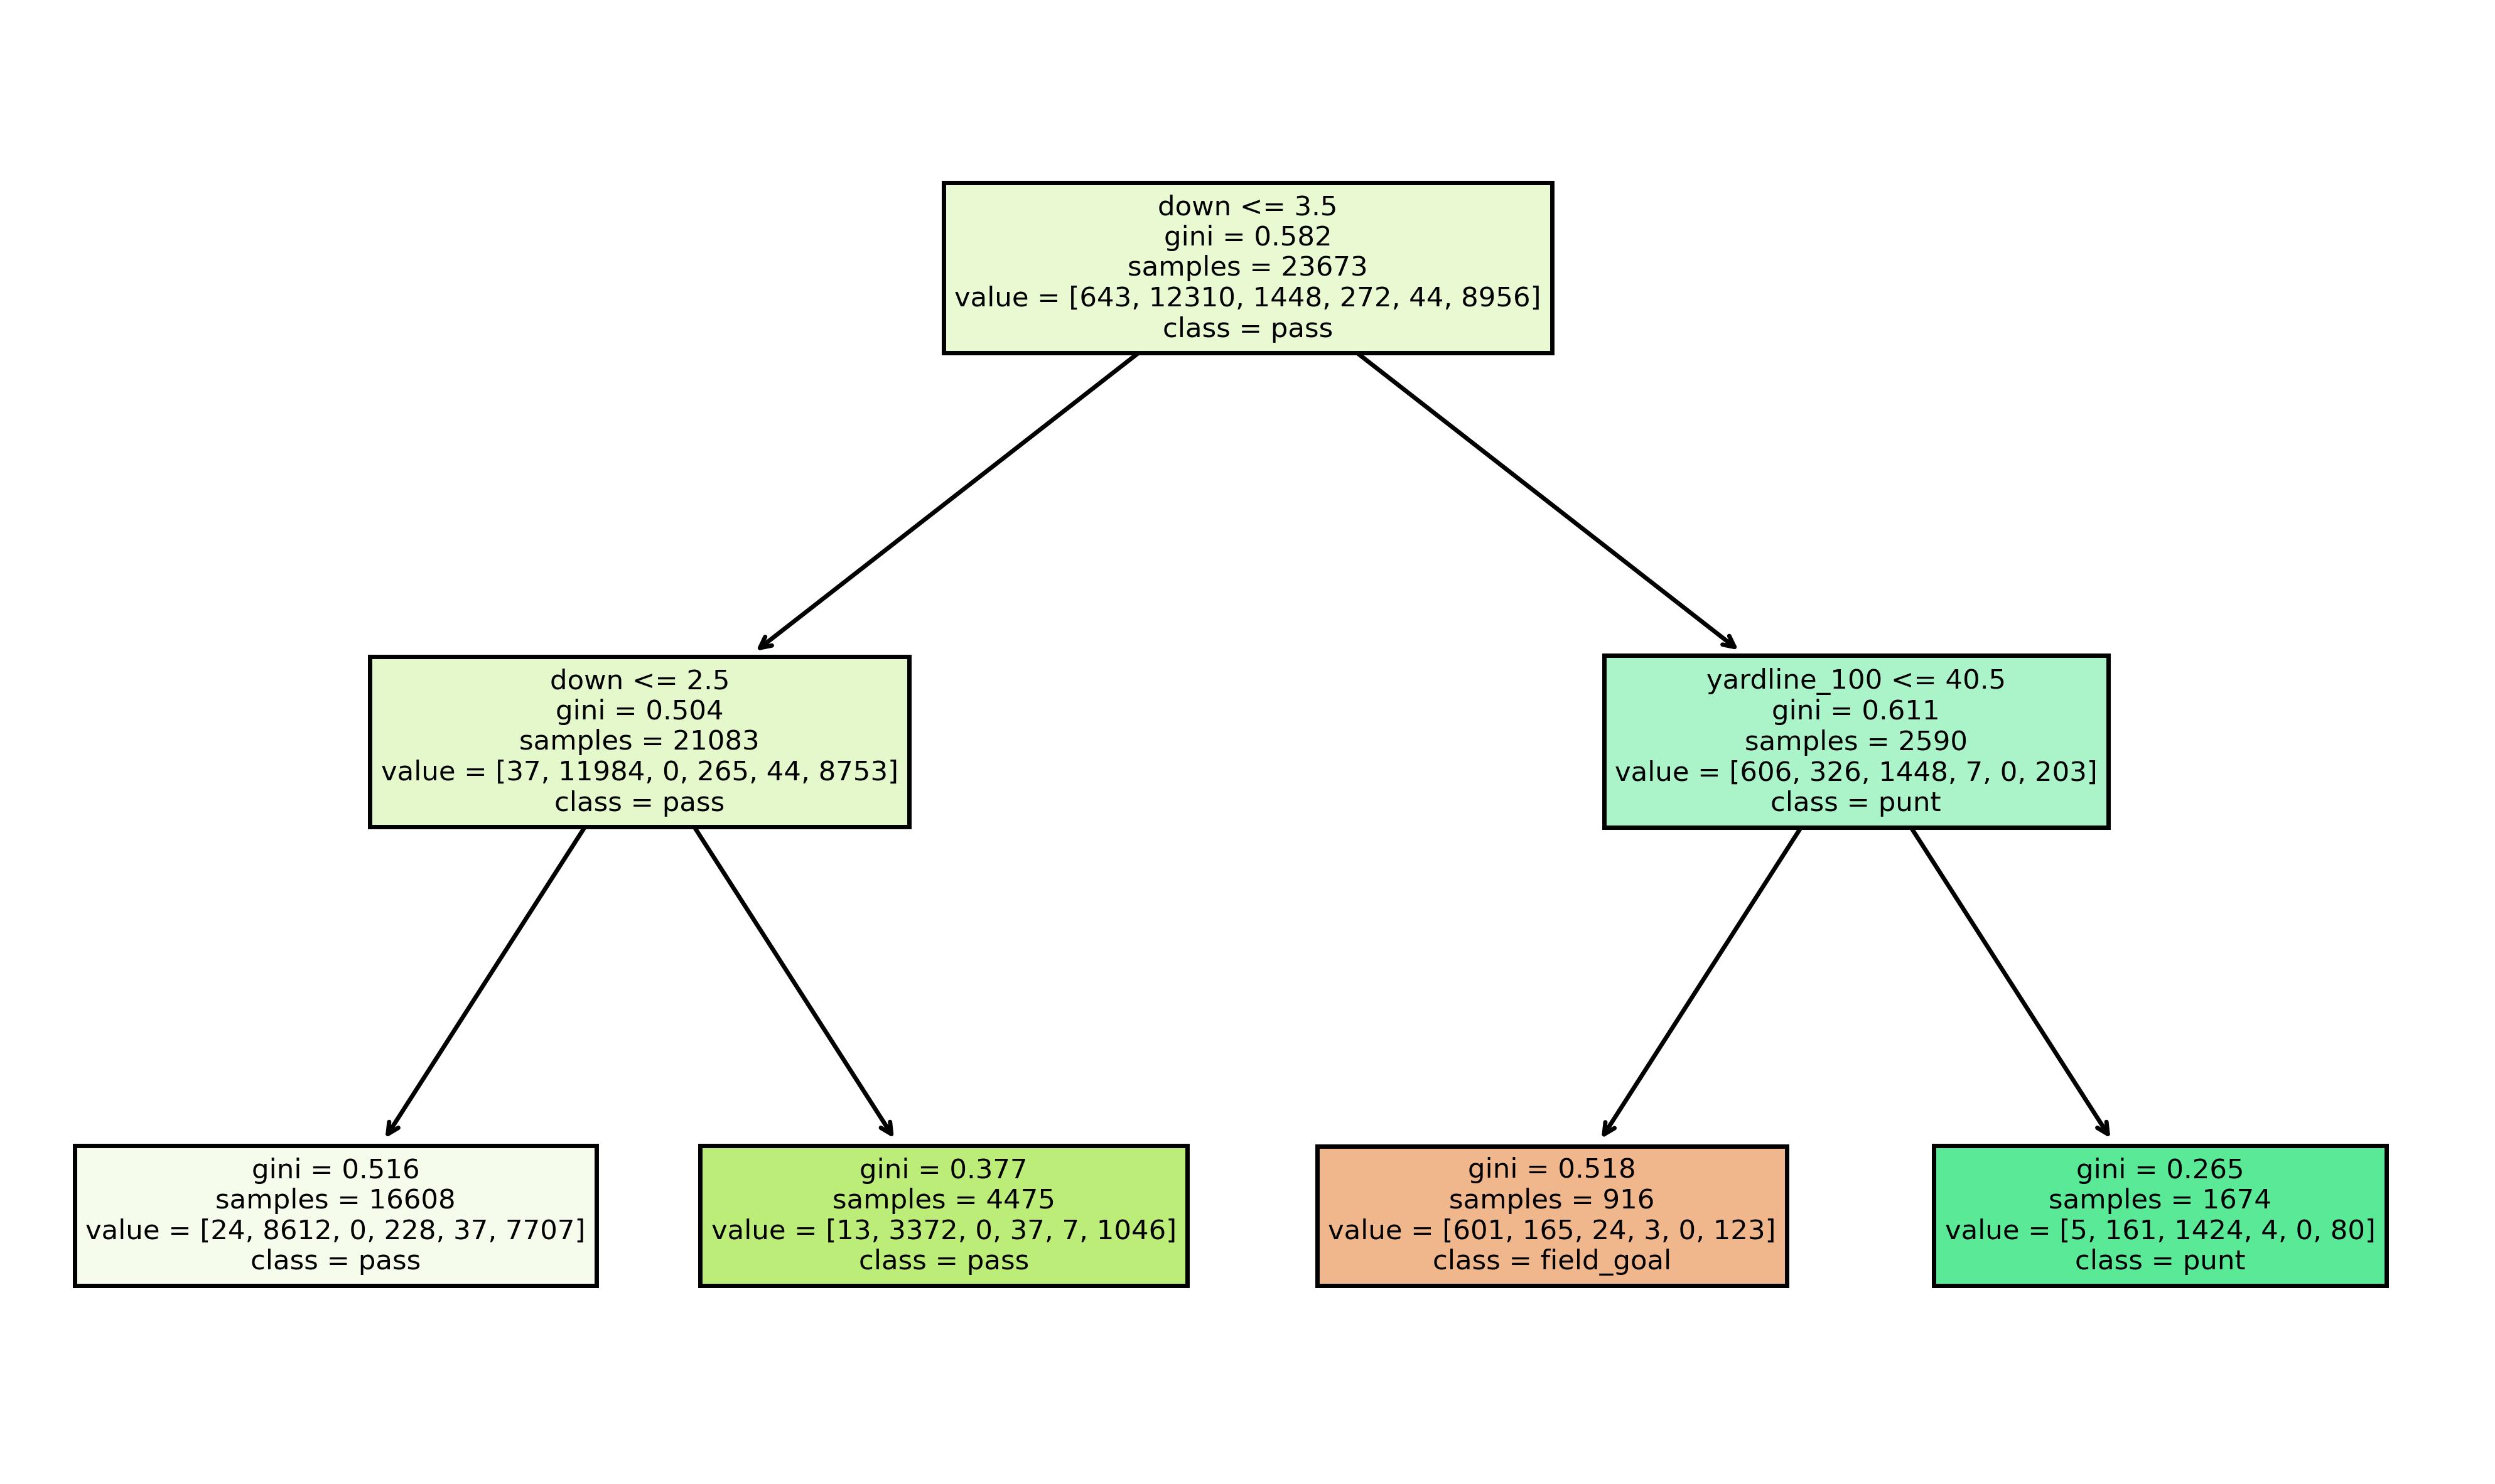

In [207]:
plays_predictors = plays23[['yardline_100', 
                        'down', 
                       'quarter_seconds_remaining', 
                        'qtr', 
                        'ydstogo']]
X = plays_predictors
y = plays23[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create decision tree classifier
tree_clf_23 = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier on the training data
tree_clf_23.fit(X_train, y_train)

# Plot decision tree
plt.figure(figsize=(10, 6), dpi=500)  # Adjust the figure size and DPI
plot_tree(tree_clf_23, filled=True, feature_names=X.columns, class_names=tree_clf_23.classes_)
plt.show()

In [209]:
plays_predictors = plays23[[ 'yardline_100',
                             'quarter_seconds_remaining',
                             'half_seconds_remaining',
                             'qtr',
                             'down',
                             'ydstogo',
                             'posteam_timeouts_remaining',
                             'defteam_timeouts_remaining',
                             'posteam_score',
                             'defteam_score',
                             'score_differential']]
X = plays_predictors
y = plays23[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create decision tree classifier
tree_clf_23 = DecisionTreeClassifier(max_depth=45, random_state=42)

# Train the classifier on the training data
tree_clf_23.fit(X_train, y_train)

# Plot decision tree
#plt.figure(figsize=(10, 6), dpi=500)  # Adjust the figure size and DPI
#plot_tree(tree_clf_23, filled=True, feature_names=X.columns, class_names=tree_clf_23.classes_)
#plt.show()

DecisionTreeClassifier(max_depth=45, random_state=42)

In [210]:
importances = tree_clf_23.feature_importances_


feature_names = plays_predictors.columns

# Print the feature importances
for i, importance in zip(feature_names, importances):
    print(f"Feature {i}: {importance}")

Feature yardline_100: 0.19346182150365984
Feature quarter_seconds_remaining: 0.1308396375479188
Feature half_seconds_remaining: 0.15719321309127068
Feature qtr: 0.03173299091986611
Feature down: 0.15491929664900764
Feature ydstogo: 0.08654465742593802
Feature posteam_timeouts_remaining: 0.018689913856623868
Feature defteam_timeouts_remaining: 0.023451310109240356
Feature posteam_score: 0.05462729083179453
Feature defteam_score: 0.06393884366696426
Feature score_differential: 0.08460102439771591


In [145]:
data_predictors = data[['yardline_100', 
                        'down', 
                       'quarter_seconds_remaining', 
                        'qtr', 
                        'ydstogo']]
X = data_predictors
y = data[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=45, random_state=42)

# Train the classifier on the training data
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=45, random_state=42)

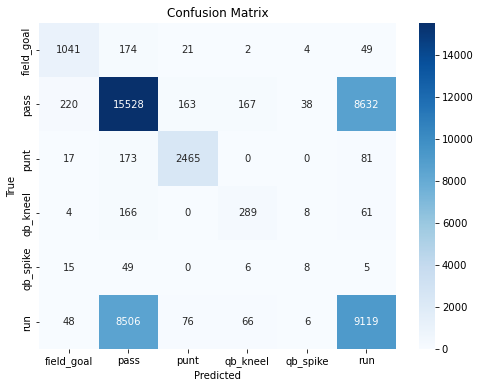

In [146]:
y_pred = tree_clf.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=tree_clf.classes_, yticklabels=tree_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [147]:
true_positives = np.diag(conf_matrix)


total_instances = np.sum(conf_matrix, axis=1)

class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)

class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']
for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%\n')


print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')

Class field_goal: 80.64%

Class pass: 62.74%

Class punt: 90.10%

Class qb_kneel: 54.73%

Class qb_spike: 9.64%

Class run: 51.17%

Overall Accuracy: 60.27%


In [148]:
importances = tree_clf.feature_importances_


feature_names = data_predictors.columns

# Print the feature importances
for i, importance in zip(feature_names, importances):
    print(f"Feature {i}: {importance}")

Feature yardline_100: 0.272897593240739
Feature down: 0.15835726338322756
Feature quarter_seconds_remaining: 0.4052112235671966
Feature qtr: 0.060631662291858464
Feature ydstogo: 0.10290225751697832


In [149]:
data_predictors = data[['yardline_100', 
                        'down', 
                       'quarter_seconds_remaining', 
                        'qtr', 
                        'ydstogo',
                        'score_differential',
                        'posteam_timeouts_remaining',
                        'defteam_timeouts_remaining']]
X = data_predictors
y = data[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=45, random_state=42)

# Train the classifier on the training data
tree_clf.fit(X_train, y_train)

# Plot decision tree
#plt.figure(figsize=(10, 6), dpi=500)  # Adjust the figure size and DPI
#plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=tree_clf.classes_)
#plt.show()

DecisionTreeClassifier(max_depth=45, random_state=42)

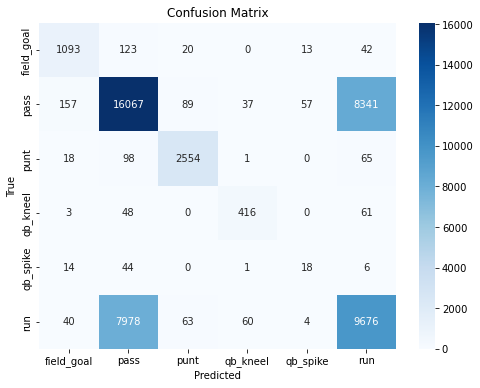

In [150]:

y_pred = tree_clf.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=tree_clf.classes_, yticklabels=tree_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  field_goal       0.82      0.85      0.84      1291
        pass       0.66      0.65      0.65     24748
        punt       0.94      0.93      0.94      2736
    qb_kneel       0.81      0.79      0.80       528
    qb_spike       0.20      0.22      0.21        83
         run       0.53      0.54      0.54     17821

    accuracy                           0.63     47207
   macro avg       0.66      0.66      0.66     47207
weighted avg       0.63      0.63      0.63     47207



In [152]:
importances = tree_clf.feature_importances_


feature_names = data_predictors.columns

# Print the feature importances
for i, importance in zip(feature_names,importances):
    print(f"Feature {i}: {importance}")

Feature yardline_100: 0.22550980262201636
Feature down: 0.15414177966920248
Feature quarter_seconds_remaining: 0.285465723120569
Feature qtr: 0.052175682148374404
Feature ydstogo: 0.08925634513969166
Feature score_differential: 0.12977008305093207
Feature posteam_timeouts_remaining: 0.02871700249452019
Feature defteam_timeouts_remaining: 0.034963581754693836


In [153]:
true_positives = np.diag(conf_matrix)


total_instances = np.sum(conf_matrix, axis=1)

class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)

class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']
for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%\n')


print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')

Class field_goal: 84.66%

Class pass: 64.92%

Class punt: 93.35%

Class qb_kneel: 78.79%

Class qb_spike: 21.69%

Class run: 54.30%

Overall Accuracy: 63.18%


In [154]:
kc= data[data['posteam'] == 'KC']

kc_predictors = kc[['yardline_100', 
                        'down', 
                        'quarter_seconds_remaining', 
                        'qtr', 
                        'ydstogo',
                        'score_differential',
                        'posteam_timeouts_remaining',
                        'defteam_timeouts_remaining']]
X_kc = kc_predictors
y_kc = kc[['play_type']]

X_train_kc, X_test_kc, y_train_kc, y_test_kc = train_test_split(X_kc, y_kc, test_size=0.4, random_state=42)

# Create decision tree classifier
tree_clf_kc = DecisionTreeClassifier(max_depth=45, random_state=42)

# Train the classifier on the training data
tree_clf_kc.fit(X_train_kc, y_train_kc)

DecisionTreeClassifier(max_depth=45, random_state=42)

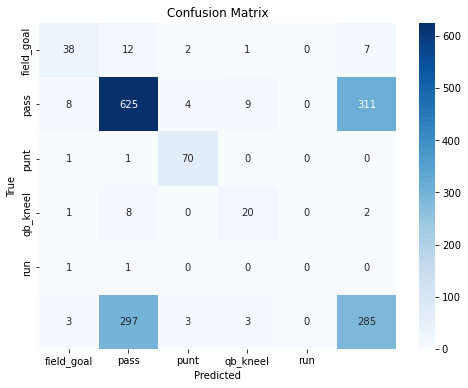

In [155]:
y_pred_kc = tree_clf_kc.predict(X_test_kc)


conf_matrix_kc = confusion_matrix(y_test_kc, y_pred_kc)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_kc, annot=True, fmt="d", cmap="Blues", xticklabels=tree_clf_kc.classes_, yticklabels=tree_clf_kc.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [156]:
true_positives = np.diag(conf_matrix_kc)


total_instances = np.sum(conf_matrix_kc, axis=1)


class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix_kc)

class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']

for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%')


print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')


Class field_goal: 63.33%
Class pass: 65.31%
Class punt: 97.22%
Class qb_kneel: 64.52%
Class qb_spike: 0.00%
Class run: 48.22%
Overall Accuracy: 60.60%


In [157]:
teams = np.unique(data['posteam'])

print(teams)
predictors = ['yardline_100', 
                            'down', 
                            'quarter_seconds_remaining', 
                            'qtr', 
                            'ydstogo',
                            'score_differential',
                            'posteam_timeouts_remaining',
                            'defteam_timeouts_remaining']

['ARI' 'ATL' 'BAL' 'BUF' 'CAR' 'CHI' 'CIN' 'CLE' 'DAL' 'DEN' 'DET' 'GB'
 'HOU' 'IND' 'JAX' 'KC' 'LA' 'LAC' 'LV' 'MIA' 'MIN' 'NE' 'NO' 'NYG' 'NYJ'
 'PHI' 'PIT' 'SEA' 'SF' 'TB' 'TEN' 'WAS']


In [158]:
def plays_by_team(team, predictors):
    #Get Team Data
    team_data = data[data['posteam'] == team]
    #X is the predictors we passed in and y is what we want to predict
    X_team = team_data[predictors]
    y_team = team_data[['play_type']]

    #Want to create a 40/60 train test split
    X_train_team, X_test_team, y_train_team, y_test_team = train_test_split(X_team, y_team, test_size=0.4, random_state=42)

    #make the tree
    tree_clf_team = DecisionTreeClassifier(max_depth=45, random_state=42)

    #train the tree
    tree_clf_team.fit(X_train_team, y_train_team)
    
    #test our tree
    y_pred_team = tree_clf_team.predict(X_test_team)

    #create a confusion matrix with our test data
    conf_matrix_team = confusion_matrix(y_test_team, y_pred_team)
    
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_team, annot=True, fmt="d", cmap="Blues", xticklabels=tree_clf_team.classes_, yticklabels=tree_clf_team.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {team}')
    true_positives = np.diag(conf_matrix_team)


    total_instances = np.sum(conf_matrix_team, axis=1)


    class_accuracy = true_positives / total_instances


    overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix_team)

    class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']
    
    accuracy_data = f'Accuracy Data for: {team}\n'
    for i, acc in zip(class_names, class_accuracy):
        accuracy_data += f'Class {i}: {acc*100:.2f}%\n'
        
    Overall = f'Overall Accuracy: {overall_accuracy*100:.2f}%\n'


    return conf_matrix_team, accuracy_data, Overall


Accuracy Data for: LAC
Class field_goal: 64.10%
Class pass: 70.25%
Class punt: 90.36%
Class qb_kneel: 46.67%
Class qb_spike: 0.00%
Class run: 48.30%

Overall Accuracy: 63.58%



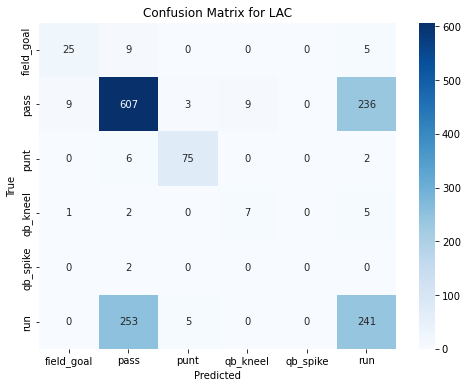

In [159]:
conf_matrix_kc, accuracy_data_kc, overall_kc = plays_by_team("LAC", predictors)
print(accuracy_data_kc)
print(overall_kc)

C:\Users\camdi\AppData\Local\Temp/ipykernel_43632/2758606775.py:35: RuntimeWarning: invalid value encountered in divide
  class_accuracy = true_positives / total_instances
C:\Users\camdi\AppData\Local\Temp/ipykernel_43632/2758606775.py:35: RuntimeWarning: invalid value encountered in divide
  class_accuracy = true_positives / total_instances
C:\Users\camdi\AppData\Local\Temp/ipykernel_43632/2758606775.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 6))


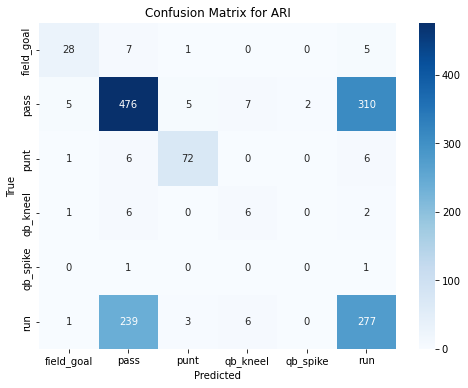

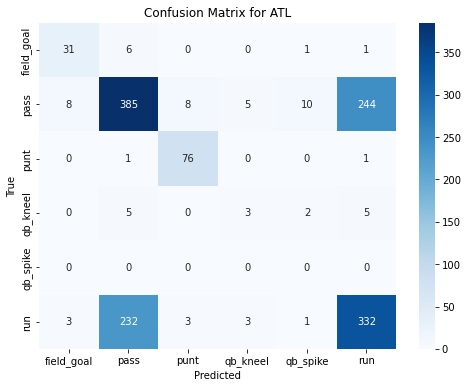

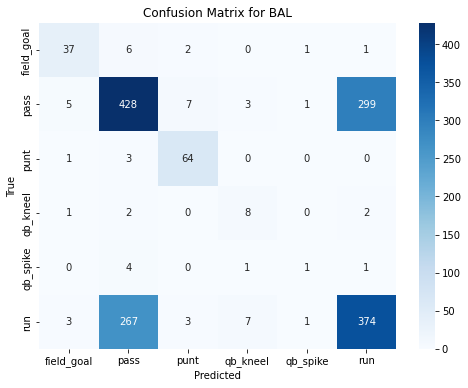

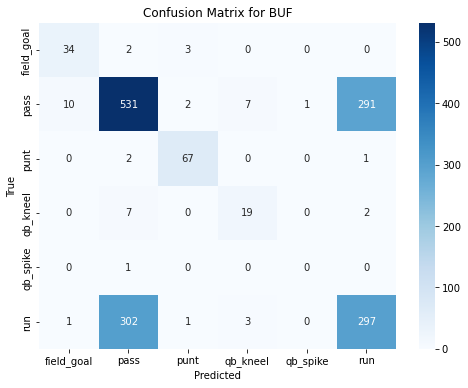

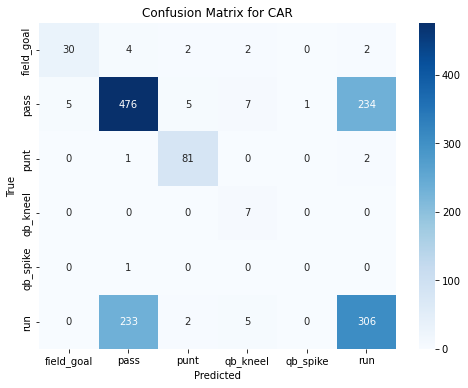

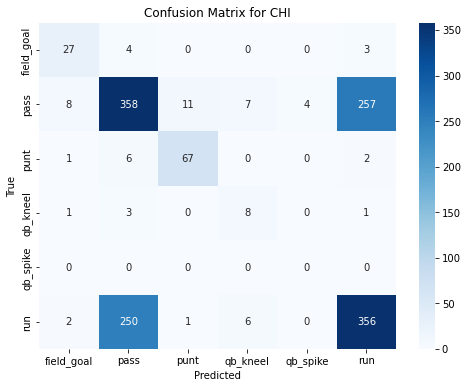

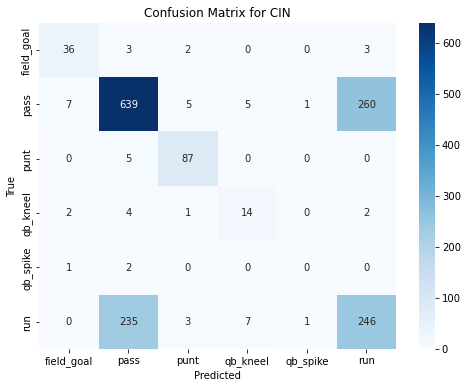

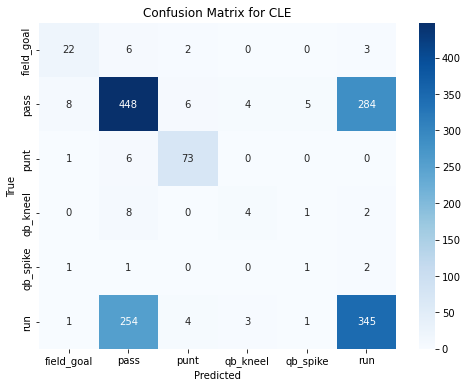

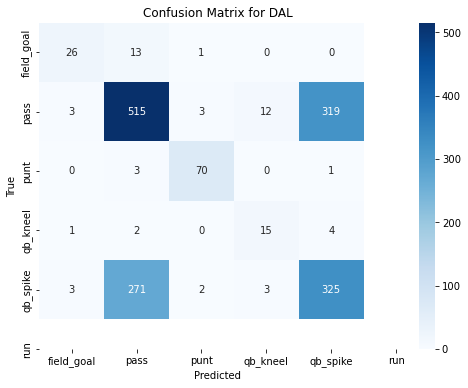

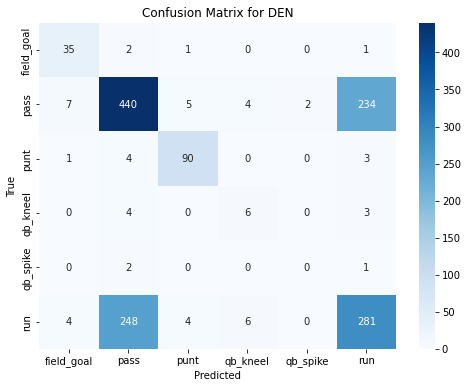

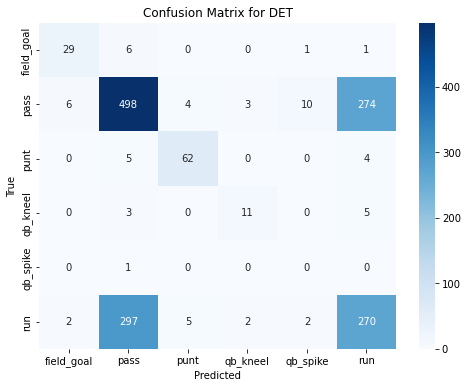

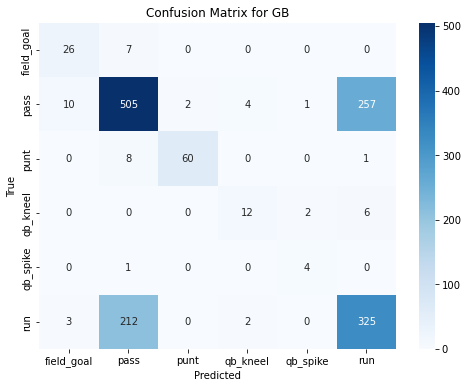

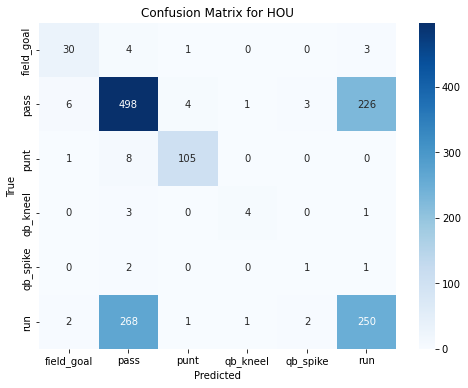

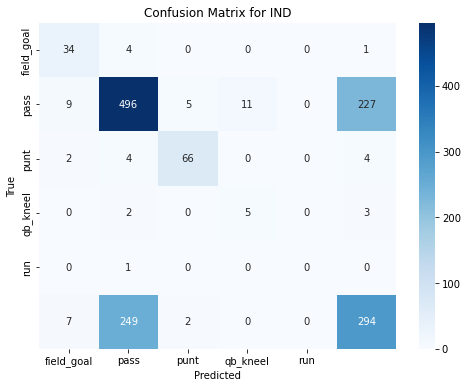

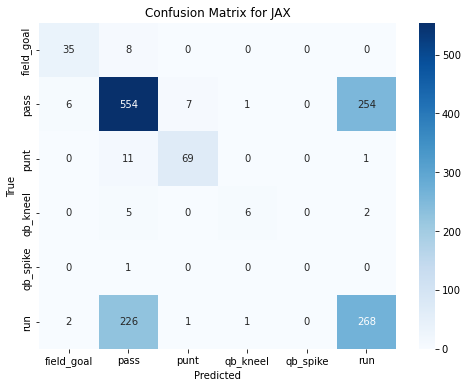

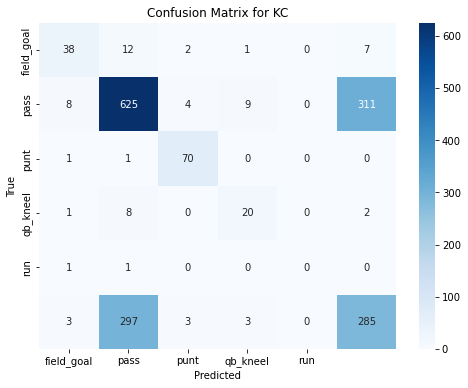

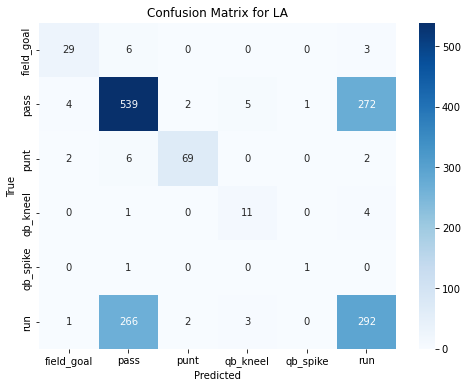

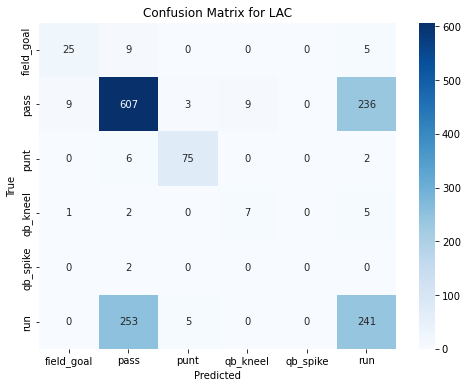

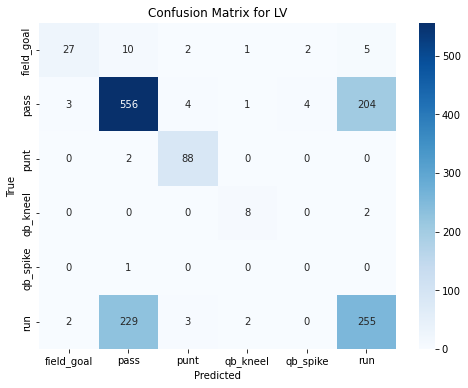

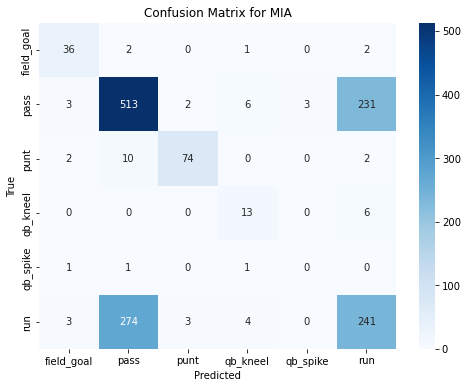

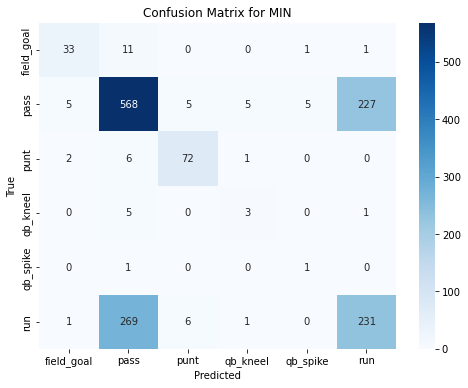

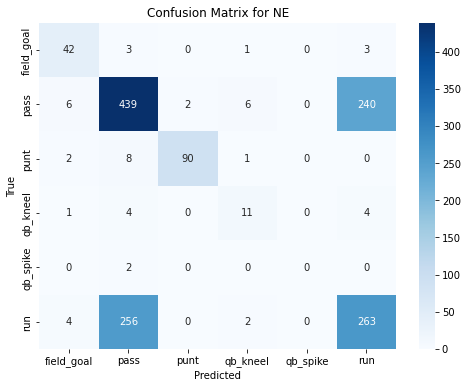

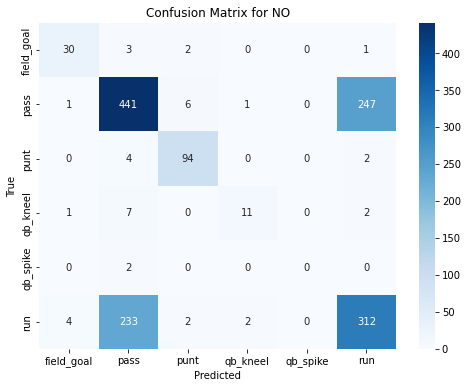

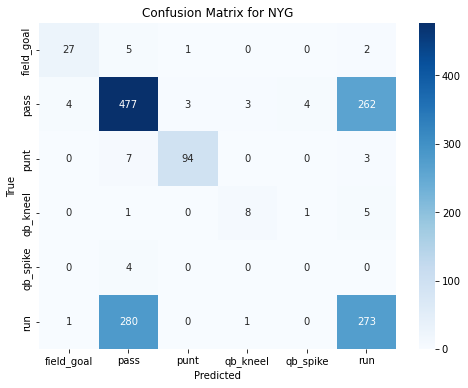

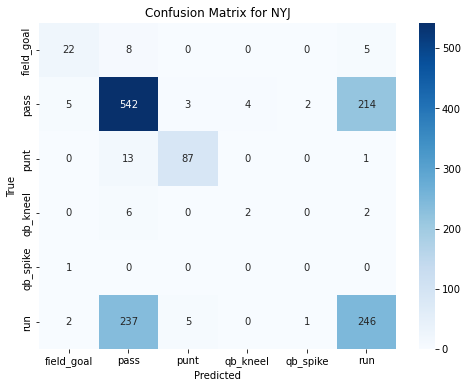

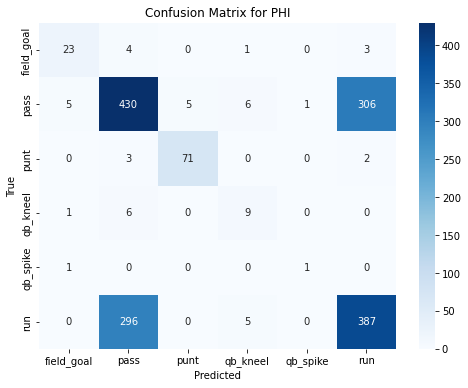

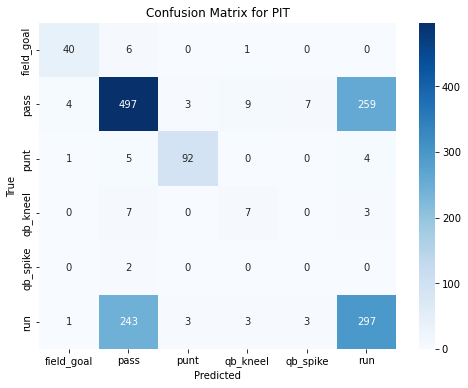

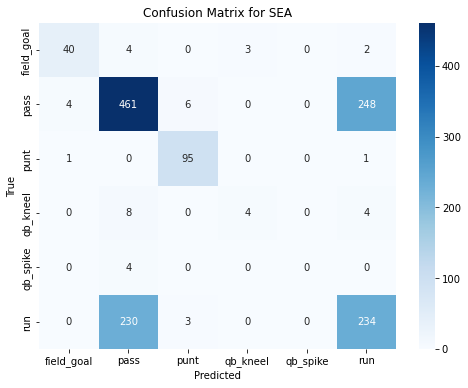

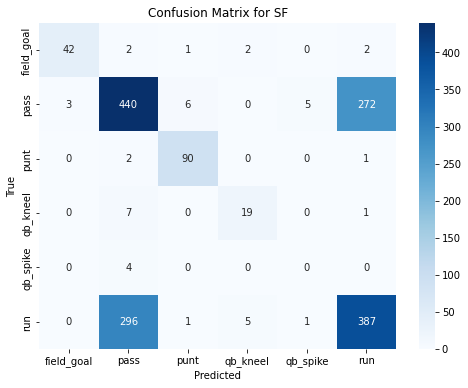

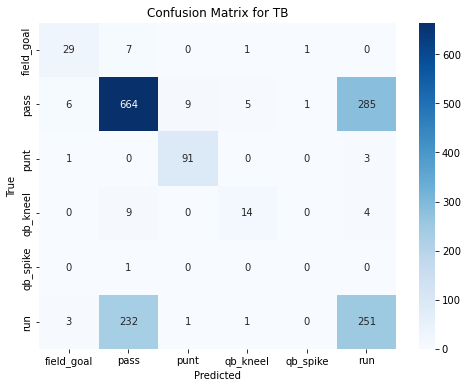

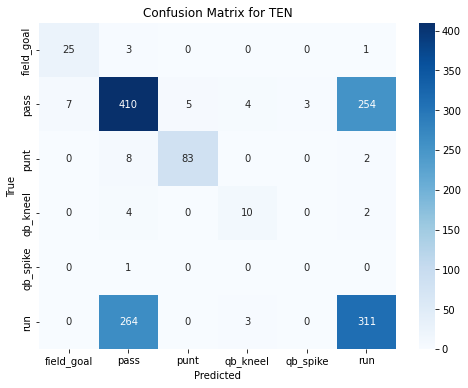

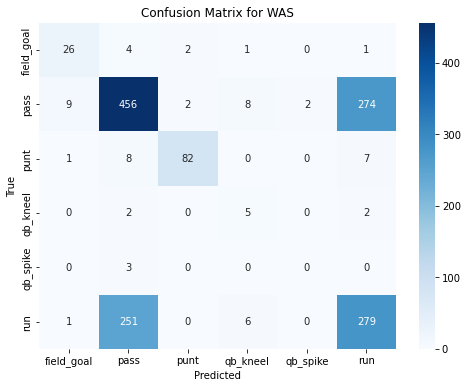

In [160]:
team_results = {}
for i in teams:
    conf_matrix_team, accuracy_data_team, overall_team = plays_by_team(i, predictors)
    team_results[i] = {
        'conf_matrix': conf_matrix_team,
        'accuracy_data': accuracy_data_team,
        'overall': overall_team
    }

In [161]:
team_name = 'DEN'  
print(team_results[team_name]['accuracy_data'])

Accuracy Data for: DEN
Class field_goal: 89.74%
Class pass: 63.58%
Class punt: 91.84%
Class qb_kneel: 46.15%
Class qb_spike: 0.00%
Class run: 51.75%



In [162]:
for i in teams:
    print(i + ' ' +team_results[i]['overall'])

ARI Overall Accuracy: 58.28%

ATL Overall Accuracy: 60.54%

BAL Overall Accuracy: 59.49%

BUF Overall Accuracy: 59.85%

CAR Overall Accuracy: 64.01%

CHI Overall Accuracy: 59.00%

CIN Overall Accuracy: 65.05%

CLE Overall Accuracy: 59.69%

DAL Overall Accuracy: 59.74%

DEN Overall Accuracy: 61.38%

DET Overall Accuracy: 57.96%

GB Overall Accuracy: 64.36%

HOU Overall Accuracy: 62.27%

IND Overall Accuracy: 62.76%

JAX Overall Accuracy: 63.92%

KC Overall Accuracy: 60.60%

LA Overall Accuracy: 61.83%

LAC Overall Accuracy: 63.58%

LV Overall Accuracy: 66.19%

MIA Overall Accuracy: 61.16%

MIN Overall Accuracy: 62.15%

NE Overall Accuracy: 60.79%

NO Overall Accuracy: 63.07%

NYG Overall Accuracy: 59.96%

NYJ Overall Accuracy: 63.85%

PHI Overall Accuracy: 58.81%

PIT Overall Accuracy: 62.32%

SEA Overall Accuracy: 61.69%

SF Overall Accuracy: 61.55%

TB Overall Accuracy: 64.79%

TEN Overall Accuracy: 59.93%

WAS Overall Accuracy: 59.22%



NEXT MODELS TO TRY:
 *Random Forest
 *KNN
 *SVM
 *GBM

## Random Forest

In [163]:
data_predictors = data[['yardline_100', 
                        'down', 
                       'quarter_seconds_remaining', 
                        'qtr', 
                        'ydstogo',
                        'score_differential',
                        'posteam_timeouts_remaining',
                        'defteam_timeouts_remaining']]
X = data_predictors
y = data[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

C:\Users\camdi\AppData\Local\Temp/ipykernel_43632/1311259862.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

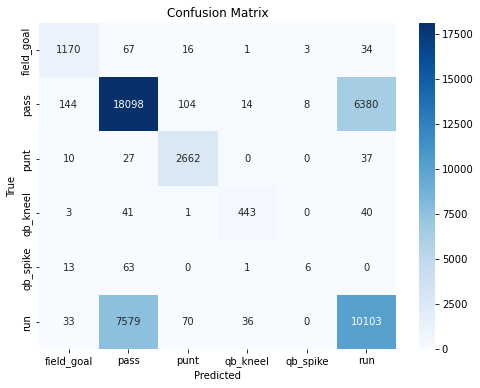

In [164]:
y_pred = rf_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [165]:
true_positives = np.diag(conf_matrix)


total_instances = np.sum(conf_matrix, axis=1)

class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)


class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']
for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%\n')

print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')

Class field_goal: 90.63%

Class pass: 73.13%

Class punt: 97.30%

Class qb_kneel: 83.90%

Class qb_spike: 7.23%

Class run: 56.69%

Overall Accuracy: 68.81%


In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  field_goal       0.85      0.91      0.88      1291
        pass       0.70      0.73      0.72     24748
        punt       0.93      0.97      0.95      2736
    qb_kneel       0.89      0.84      0.87       528
    qb_spike       0.35      0.07      0.12        83
         run       0.61      0.57      0.59     17821

    accuracy                           0.69     47207
   macro avg       0.72      0.68      0.69     47207
weighted avg       0.68      0.69      0.69     47207



## KNN

In [167]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn_classifier.predict(X_test)

C:\Users\camdi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


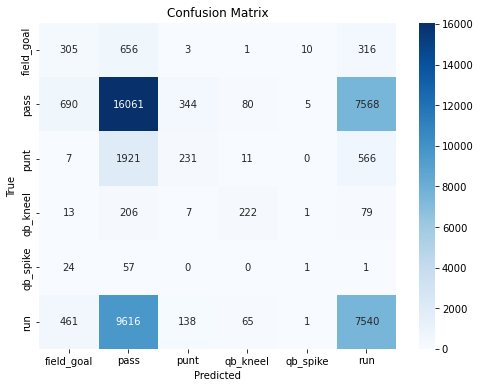

In [168]:
conf_matrix = confusion_matrix(y_test, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [169]:
true_positives = np.diag(conf_matrix)


total_instances = np.sum(conf_matrix, axis=1)

class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)


class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']
for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%\n')

print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')

Class field_goal: 23.63%

Class pass: 64.90%

Class punt: 8.44%

Class qb_kneel: 42.05%

Class qb_spike: 1.20%

Class run: 42.31%

Overall Accuracy: 51.60%


## Which Coaches make the right desicion?

We have to define success of a play.
4th down success = Touchdown, 1st down, made field goal or punt net of 40, knee or spike within 2mins
3rd down success = Touchdown, 1st down, run play when leading with in 5 mins left in 4th, knee or spike within 2mins
2nd down success = Touchdown, 1st down, 1/2 yards left to gain, run play leading with 5 mins left in 4th, knee or spike within 2mins
1st down success = Touchdown, 1st down, 1/3 yards left to gain, run play leading with 5 mins left in 4th, knee or spike within 2mins

In [129]:
def is_successful_play(row):
    play_type = row['play_type']
    down = row['down']
    yards_to_go = row['ydstogo']
    yards_gained = row['yards_gained']
    touchdown = row['touchdown']
    score_differential = row['score_differential']
    half_seconds_remaining = row['half_seconds_remaining']
    field_goal_result= row['field_goal_result']
    kick_distance = row['kick_distance']
    quarter = row['qtr']
    ### FIX TIME REMAINING TO SECOND IN QRT AND ADD A FIELD GOAL MADE TO 1,2,3 down and 2,4 qrt with less 60 secs left
    if down == 4:
        if touchdown == 1 or (float(yards_to_go) - float(yards_gained) <= 0) or (play_type == 'punt' and kick_distance >= 40) or (play_type == 'field_goal' and field_goal_result == 'made'):
            return "yes"
    elif down == 3:
        if touchdown == 1 or (float(yards_to_go) - float(yards_gained) <= 0) or (play_type == 'run' and score_differential > 0 and half_seconds_remaining < 300) or ((play_type == 'qb_kneel' or play_type == 'qb_spike') and half_seconds_remaining <= 120) or (play_type == 'field_goal' and field_goal_result == 'made'):
            return "yes"
    elif down == 2:
        if touchdown == 1 or (float(yards_gained)/float(yards_to_go) >= 1.0/2.0) or (play_type == 'run' and score_differential > 0 and half_seconds_remaining < 300) or ((play_type == 'qb_kneel' or play_type == 'qb_spike') and half_seconds_remaining <= 120) or (play_type == 'field_goal' and field_goal_result == 'made'):
            return "yes"
    elif down == 1:
        if touchdown == 1 or (float(yards_gained)/float(yards_to_go) >= 1.0/3.0) or (play_type == 'run' and score_differential > 0 and half_seconds_remaining < 300) or ((play_type == 'qb_kneel' or play_type == 'qb_spike')  and half_seconds_remaining <= 120) or (play_type == 'field_goal' and field_goal_result == 'made'):
            return "yes"
    return "no"

# Apply the function to each row of the dataframe and store the result in a new column
data['success'] = data.apply(is_successful_play, axis=1)
data

,season_type,posteam,posteam_type,side_of_field,yardline_100,quarter_seconds_remaining,half_seconds_remaining,qtr,down,time,...,field_goal_attempt,punt_attempt,offense_formation,offense_personnel,route,o_personnel,personnel_num,success,cluster,clusterLESS
1,REG,TEN,home,TEN,75,900,1800,1,1.0,15:00,...,0,0,SINGLEBACK,"1 RB, 2 TE, 2 WR",NaN,"1 RB, 2 TE, 2 WR",12.0,no,42,3
2,REG,TEN,home,TEN,78,863,1763,1,2.0,14:23,...,0,0,SHOTGUN,"1 RB, 2 TE, 2 WR",ANGLE,"1 RB, 2 TE, 2 WR",12.0,no,463,3
3,REG,TEN,home,TEN,75,822,1722,1,3.0,13:42,...,0,0,SHOTGUN,"1 RB, 1 TE, 3 WR",HITCH,"1 RB, 1 TE, 3 WR",11.0,no,638,3
4,REG,TEN,home,TEN,75,819,1719,1,4.0,13:39,...,0,1,NaN,NaN,NaN,NaN,NaN,yes,194,3
5,REG,ARI,away,ARI,61,807,1707,1,1.0,13:27,...,0,0,SHOTGUN,"1 RB, 2 TE, 2 WR",GO,"1 RB, 2 TE, 2 WR",12.0,yes,130,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130819,POST,KC,home,SF,37,168,168,5,2.0,02:48,...,0,0,SHOTGUN,"1 RB, 1 TE, 3 WR",SCREEN,"1 RB, 1 TE, 3 WR",11.0,yes,666,0
130820,POST,KC,home,SF,32,127,127,5,3.0,02:07,...,0,0,SHOTGUN,"1 RB, 2 TE, 2 WR",NaN,"1 RB, 2 TE, 2 WR",12.0,yes,169,4
130821,POST,KC,home,SF,13,86,86,5,1.0,01:26,...,0,0,SHOTGUN,"1 RB, 3 TE, 1 WR",NaN,"1 RB, 3 TE, 1 WR",13.0,no,233,4
130822,POST,KC,home,SF,10,50,50,5,2.0,00:50,...,0,0,SHOTGUN,"1 RB, 1 TE, 3 WR",SCREEN,"1 RB, 1 TE, 3 WR",11.0,yes,275,4


### How Many Clusters?

### We have 2 halfs, each half has 2 types of situations middle game flow or hurry up. 4
### Lets split the field up into 4 parts, backed up <25, your side of the field, other side of field , redzone. 4 
### Score: Down a lot, Down a little, Tie, Up  a little, Up a lot. 4
### Yds: Long Medium and short. 3
### Downs: We have four downs. 4
### Thus 4x4x4x4x3 = 768

### Making a kmeans clusters to get the the situations that are simiar clustered together

In [130]:
data_predictors = ['yardline_100', 
                       'half_seconds_remaining', 
                       'down',
                        'ydstogo',
                        'score_differential']

n_clusters = 768  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#kmeans.fit(data[data_predictors])

data['cluster'] = kmeans.fit_predict(data[data_predictors])

#centroid_coordinates = kmeans.cluster_centers_
#print("Centroid coordinates:")
#print(centroid_coordinates)

# Cluster sizes
#print("Cluster sizes:")
#print(cluster_sizes)

In [143]:
data_predictors = ['yardline_100', 
                       'half_seconds_remaining', 
                       'down',
                        'ydstogo',
                        'score_differential']

n_clustersLESS = 10  # Adjust the number of clusters as needed
kmeansLESS = KMeans(n_clusters=n_clusters, random_state=42)
#kmeans.fit(data[data_predictors])

data['clusterLESS'] = kmeansLESS.fit_predict(data[data_predictors])

cluster_success_rates = {}
for cluster_id in range(768):
    cluster_data = data[data['cluster'] == cluster_id]
    success_rate = cluster_data.groupby('play_type')['success'].apply(lambda x: (x == 'yes').mean() * 100)
    cluster_success_rates[cluster_id] = dict(success_rate)
predicted_cluster = kmeans.predict([['75', '4','500', '1', '2']])
predicted_cluster[0]
cluster_success_rates[predicted_cluster[0]]

{'pass': 51.388888888888886, 'punt': 100.0, 'run': 42.857142857142854}

In [213]:
data_testing = data

# Define an empty dictionary to store data_down variables
data_down_dict = {}

for unique_down in data['down'].unique():
    data_down_name = f"data_down{int(unique_down)}"
    data_down_dict[data_down_name] = data_testing[data_testing['down'] == unique_down]
    data_predictors = ['yardline_100', 
                       'half_seconds_remaining', 
                       'ydstogo',
                       'score_differential']

    n_clusters = 50  # Adjust the number of clusters as needed
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    #kmeans.fit(data[data_predictors])

    data_down_dict[data_down_name]['cluster'] = kmeans.fit_predict(data_down_dict[data_down_name][data_predictors])

C:\Users\camdi\AppData\Local\Temp/ipykernel_22704/4274098378.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_down_dict[data_down_name]['cluster'] = kmeans.fit_predict(data_down_dict[data_down_name][data_predictors])
C:\Users\camdi\AppData\Local\Temp/ipykernel_22704/4274098378.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_down_dict[data_down_name]['cluster'] = kmeans.fit_predict(data_down_dict[data_down_name][data_predictors])
C:\Users\camdi\AppData\Local\Temp/ipykernel_22704/4274098378

In [215]:
def get_play_success(down, data_predictors):
    if down == 1:
        down_data = data_down_dict['data_down1']
    elif down == 2:
        down_data = data_down_dict['data_down2']
    elif down == 3:
        down_data = data_down_dict['data_down3']
    elif down == 4:
        down_data = data_down_dict['data_down4']
        
        
    cluster_success_rates = {}
    for cluster_id in range(192):
        cluster_data = down_data['cluster'] == cluster_id]
        success_rate = cluster_data.groupby('play_type')['success'].apply(lambda x: (x == 'yes').mean() * 100)
        cluster_success_rates[cluster_id] = dict(success_rate)

    predicted_cluster = kmeans.predict(['2','350', '1', '10'])
    predicted_cluster[0]
    print(cluster_success_rates[predicted_cluster[0]])

get_play_success(1, ['2','350', '1', '10'])    

{}


In [218]:
cluster_success_rates = {}
for cluster_id in range(192):
    cluster_data = data_down_dict['data_down1'][data_down_dict['data_down1']['clusterLESS'] == cluster_id]
    success_rate = cluster_data.groupby('play_type')['success'].apply(lambda x: (x == 'yes').mean() * 100)
    cluster_success_rates[cluster_id] = dict(success_rate)

predicted_cluster = kmeans.predict(['2','350', '1', '10'])
predicted_cluster[0]
print(cluster_success_rates[predicted_cluster[0]]  
    

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_22704/1633357871.py, line 10)

### Putting the success for each the play type of each cluster in a dictionary

In [134]:
cluster_success_rates = {}
for cluster_id in range(768):
    cluster_data = data[data['cluster'] == cluster_id]
    success_rate = cluster_data.groupby('play_type')['success'].apply(lambda x: (x == 'yes').mean() * 100)
    cluster_success_rates[cluster_id] = dict(success_rate)

In [147]:
predicted_cluster = kmeans.predict([['75', '4','500', '1', '2']])
predicted_cluster[0]
cluster_success_rates[predicted_cluster[0]]

{'pass': 51.388888888888886, 'punt': 100.0, 'run': 42.857142857142854}

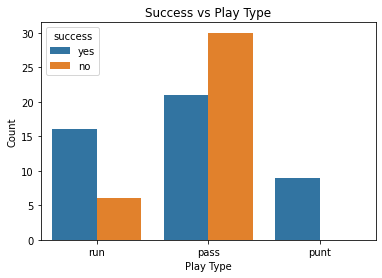

In [94]:
cluster_data = data[data['cluster'] == 1]
x_cluster = cluster_data['play_type']
y_cluster = cluster_data['success']

sns.countplot(data= cluster_data, x='play_type', hue='success')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.title('Success vs Play Type')
plt.show()

In [101]:
success_rate = cluster_data.groupby('play_type')['success'].apply(lambda x: (x == 'yes').mean() * 100)
print("Success Rate:")
print(success_rate)

Success Rate:
play_type
pass     41.176471
punt    100.000000
run      72.727273
Name: success, dtype: float64


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

best_categories = {}

for cluster_id in range(n_clusters):
    cluster_data = data[data['cluster'] == cluster_id]
    X_cluster = cluster_data[data_predictors]
    y_cluster = cluster_data['success']
    
    # Find the best category within the cluster
    best_category = None
    best_accuracy = 0
    for category in cluster_data['play_type'].unique():
        X_category = X_cluster[cluster_data['play_type'] == category]
        y_category = y_cluster[cluster_data['play_type'] == category]

        # Check if there are enough samples and classes
        if len(X_category) > 1 and len(y_category.unique()) > 1:
            # Split data into train and test sets
            X_train, X_test, y_train, y_test = train_test_split(X_category, y_category, test_size=0.4, random_state=42)

            # Train a classifier
            clf = LogisticRegression()
            clf.fit(X_train, y_train)

            # Evaluate classifier's performance
            accuracy = accuracy_score(y_test, clf.predict(X_test))

            # Update best category if accuracy is higher
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_category = category
    
    # Store the best category for this cluster
    best_categories[cluster_id] = (best_category, best_accuracy)

print("Best categories for each cluster:")
for cluster_id, (category, accuracy) in best_categories.items():
    print(f"Cluster {cluster_id}: Best category: {category}, Accuracy: {accuracy}")


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'no'

C:\Users\camdi\AppData\Local\Temp/ipykernel_22704/4168843591.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


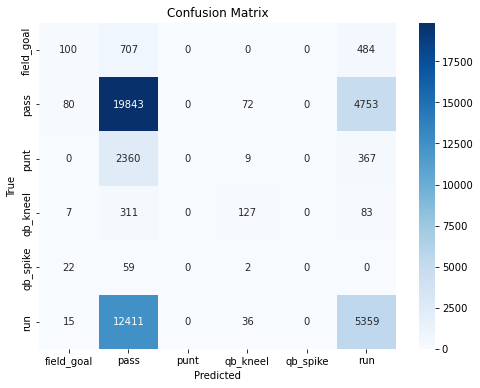

In [80]:
X = data[['cluster']]
y = data[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Half Seconds

C:\Users\camdi\AppData\Local\Temp/ipykernel_43632/3030537786.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


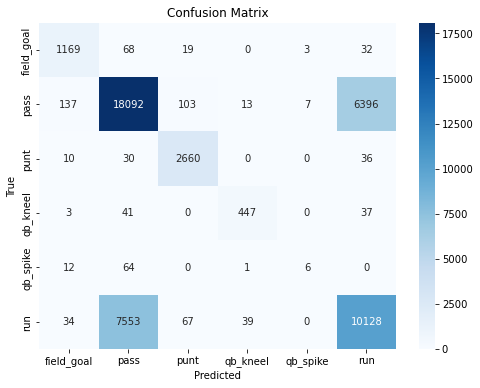

In [172]:
data_predictors = data[['yardline_100', 
                        'down', 
                       'half_seconds_remaining', 
                        'qtr', 
                        'ydstogo',
                        'score_differential',
                        'posteam_timeouts_remaining',
                        'defteam_timeouts_remaining']]
X = data_predictors
y = data[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [173]:
true_positives = np.diag(conf_matrix)


total_instances = np.sum(conf_matrix, axis=1)

class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)


class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']
for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%\n')

print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')

Class field_goal: 90.55%

Class pass: 73.10%

Class punt: 97.22%

Class qb_kneel: 84.66%

Class qb_spike: 7.23%

Class run: 56.83%

Overall Accuracy: 68.85%


# Split the data into 1st Down and 2nd down vs 3rd and 4th

## 1st and 2nd

In [26]:
data12 = data[(data['down'] == 2) | (data['down'] == 1)]
data_predictors = data12[['yardline_100', 
                        'down', 
                       'half_seconds_remaining', 
                        'qtr', 
                        'ydstogo',
                        'score_differential',
                        'posteam_timeouts_remaining',
                        'defteam_timeouts_remaining']]
X = data_predictors
y = data12[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

C:\Users\camdi\AppData\Local\Temp/ipykernel_22704/3640795566.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


KeyboardInterrupt: 

In [182]:
true_positives = np.diag(conf_matrix)


total_instances = np.sum(conf_matrix, axis=1)

class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)


class_names = ['field_goal', 'pass', 'qb_kneel', 'qb_spike', 'run']
for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%\n')

print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')

Class field_goal: 53.52%

Class pass: 66.49%

Class qb_kneel: 86.30%

Class qb_spike: 12.66%

Class run: 58.00%

Overall Accuracy: 62.73%


# 3rd and 4th

C:\Users\camdi\AppData\Local\Temp/ipykernel_43632/1486130057.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


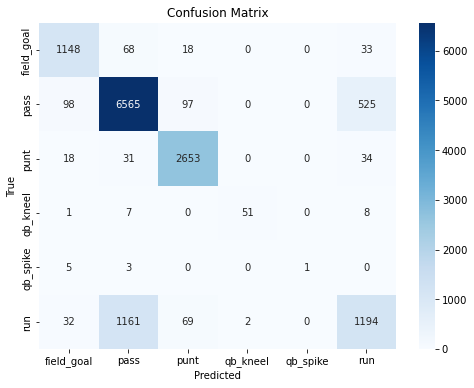

In [183]:
data34 = data[(data['down'] == 3) | (data['down'] == 4)]
data_predictors = data34[['yardline_100', 
                        'down', 
                       'half_seconds_remaining', 
                        'qtr', 
                        'ydstogo',
                        'score_differential',
                        'posteam_timeouts_remaining',
                        'defteam_timeouts_remaining']]
X = data_predictors
y = data34[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [185]:
true_positives = np.diag(conf_matrix)


total_instances = np.sum(conf_matrix, axis=1)

class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)


class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']
for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%\n')

print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')


Class field_goal: 90.61%

Class pass: 90.12%

Class punt: 96.97%

Class qb_kneel: 76.12%

Class qb_spike: 11.11%

Class run: 48.58%

Overall Accuracy: 84.01%


## 2nd, 3rd, 4th

C:\Users\camdi\AppData\Local\Temp/ipykernel_43632/1160818272.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


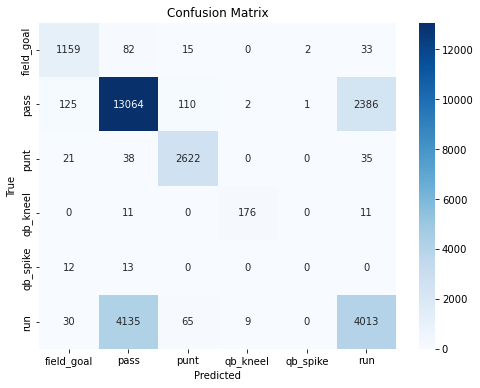

In [186]:
data234 = data[(data['down'] == 3) | (data['down'] == 4) | (data['down'] == 2)]
data_predictors = data234[['yardline_100', 
                        'down', 
                       'half_seconds_remaining', 
                        'qtr', 
                        'ydstogo',
                        'score_differential',
                        'posteam_timeouts_remaining',
                        'defteam_timeouts_remaining']]
X = data_predictors
y = data234[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [187]:
true_positives = np.diag(conf_matrix)


total_instances = np.sum(conf_matrix, axis=1)

class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)


class_names = ['field_goal', 'pass', 'punt', 'qb_kneel', 'qb_spike', 'run']
for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%\n')

print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')


Class field_goal: 89.78%

Class pass: 83.27%

Class punt: 96.54%

Class qb_kneel: 88.89%

Class qb_spike: 0.00%

Class run: 48.63%

Overall Accuracy: 74.67%


## 1st

C:\Users\camdi\AppData\Local\Temp/ipykernel_43632/2729381910.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


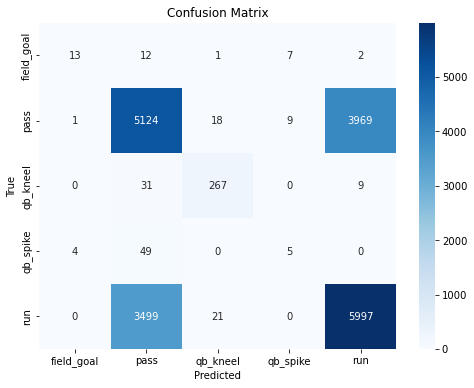

In [188]:
data1 = data[data['down'] == 1]
data_predictors = data1[['yardline_100', 
                        'down', 
                       'half_seconds_remaining', 
                        'qtr', 
                        'ydstogo',
                        'score_differential',
                        'posteam_timeouts_remaining',
                        'defteam_timeouts_remaining']]
X = data_predictors
y = data1[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [190]:
true_positives = np.diag(conf_matrix)


total_instances = np.sum(conf_matrix, axis=1)

class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)


class_names = ['field_goal', 'pass','qb_kneel', 'qb_spike', 'run']
for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%\n')

print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')

Class field_goal: 37.14%

Class pass: 56.18%

Class qb_kneel: 86.97%

Class qb_spike: 8.62%

Class run: 63.01%

Overall Accuracy: 59.91%


## 2nd

C:\Users\camdi\AppData\Local\Temp/ipykernel_43632/2494488785.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


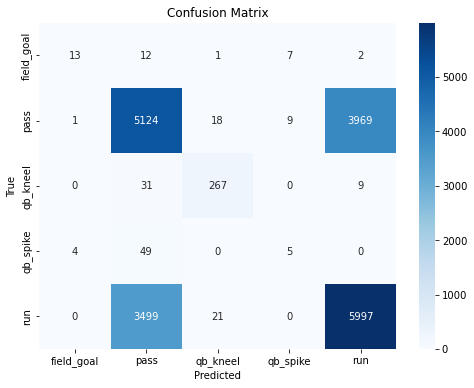

In [191]:
data1 = data[data['down'] == 1]
data_predictors = data1[['yardline_100', 
                        'down', 
                       'half_seconds_remaining', 
                        'qtr', 
                        'ydstogo',
                        'score_differential',
                        'posteam_timeouts_remaining',
                        'defteam_timeouts_remaining']]
X = data_predictors
y = data1[['play_type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [192]:
true_positives = np.diag(conf_matrix)


total_instances = np.sum(conf_matrix, axis=1)

class_accuracy = true_positives / total_instances


overall_accuracy = np.sum(true_positives) / np.sum(conf_matrix)


class_names = ['field_goal', 'pass','qb_kneel', 'qb_spike', 'run']
for i, acc in zip(class_names, class_accuracy):
    print(f'Class {i}: {acc*100:.2f}%\n')

print(f'Overall Accuracy: {overall_accuracy*100:.2f}%')

Class field_goal: 37.14%

Class pass: 56.18%

Class qb_kneel: 86.97%

Class qb_spike: 8.62%

Class run: 63.01%

Overall Accuracy: 59.91%
